<a href="https://colab.research.google.com/github/koushikchimakurthi/DigitsMNIST/blob/master/DigitsMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
import keras.datasets.mnist as mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [ ]:
train_data = train_data/255.0
test_data = test_data/255.0

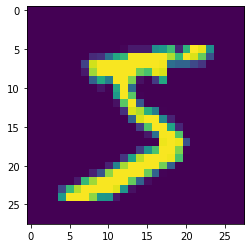

In [ ]:
plt.imshow(train_data[0])

In [ ]:
class my_callback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>0.98:
      print("\nTraining accuracy touched 98%, stopping training...!")
      self.model.stop_training = True


In [ ]:
def train_model():
  model = keras.models.Sequential([keras.layers.Flatten(),
                                   keras.layers.Dense(units=512, activation=tf.nn.relu),
                                   keras.layers.Dense(units=10, activation=tf.nn.sigmoid)])

  model.compile(optimizer = keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
  model.fit(train_data, train_labels, epochs = 10, callbacks = [my_callback()])
  return model

In [ ]:
model = train_model()

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2149 - accuracy: 0.9378
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0865 - accuracy: 0.9740
Epoch 3/10
1869/1875 [============================>.] - ETA: 0s - loss: 0.0578 - accuracy: 0.9821
Training accuracy touched 98%, stopping training...!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0579 - accuracy: 0.9821


In [ ]:
model.evaluate(test_data, test_labels])

313/313 [==============================] - 1s 2ms/step - loss: 0.0658 - accuracy: 0.9795


[0.06576383113861084, 0.9794999957084656]

In [ ]:
classifications = model.predict(test_data)

In [ ]:
print(classifications[0])
prediction = np.where(classifications[0] == np.amax(classifications[0]))
print("\nPredicted number is {}".format(prediction))
print("\nOriginal number is {}".format(test_labels[0]))

[1.3509856e-08 7.0781184e-08 4.1313560e-06 4.9367547e-04 2.0281489e-10
 1.2070568e-07 4.0768968e-12 8.7347227e-01 2.3429161e-06 8.2353936e-06]

Predicted number is (array([7]),)

Original number is 7


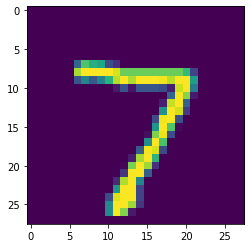

In [ ]:
plt.imshow(test_data[0])